# Analysis of Top 1000 IMDB rated movies

By: Natasha Oberoi


## Introduction

IMDB, or Internet Movie Database, is an online database launched in 1990 containing information about movies including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. It is currently the world’s most popular and authoritative source for movie, TV and celebrity content.


## Data Collection

This project analyzes the top 1000 movies IMDB-rated movies using data that was web-scraped from the IMDB website and compiled into into a Kaggle dataset. The data contains movie plot description, Metastore ratings, critic and user ratings and reviews, release dates, etc for the top 1000 movies. Make sure that the downloaded file (labeled "imdb_top_1000.csv") is in your project directory.

First, we need to import packages and libraries that we will be using throughout the tutorial. Links are provided for the general API documentation for each.

- [pandas](https://pandas.pydata.org/docs/index.html) - helps manage data
- [matplotlib](https://matplotlib.org/) - helps visualize and interpret data
- [seaborn](https://seaborn.pydata.org/) - helps visualize data
- [numpy](https://numpy.org/) - helps manage data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import data into a pandas dataframe
df = pd.read_csv('imdb_top_1000.csv') # Read the tabular csv data
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Now that we have the data stored in the pandaframe, we can alter it to best suit our needs.

First, we will remove the columns that contain data that is unnecessary or irrelevant to our analysis.

In [5]:
columns_to_drop = ['Poster_Link', 'Certificate', 'Runtime', 'Overview']
df = df.drop(columns =columns_to_drop)

We are left with the following columns:

Overview: This is a mini summary of the movie. (maybe don't drop)
- Series_Title: Name of the movie.
- Released_Year: The year in which the movie was released.
- Genre: Genre of the movie. Multiple genres were given, but I only kept the primary genre for each.
- IMDB_Rating: Rating of the movie at IMDB site. This includes any rating done by anyone with an IMDB account.
- Meta_score: Score earned by the movie when reviewed by critics.
- Director: Name of the movie’s director.
- Star1,Star2,Star3,Star4: Name of the movie stars that appeared in the movie.
- NumVotes : Total number of votes made for a given movie that went into the IMDB_Rating.
- Gross: The gross revenue earned by a given movie.

We also have to account for missing data in our pandas dataframe. We will remove any rows containing null entries.

In [6]:
# Drop any empty rows
df.dropna(inplace=True)
df.isnull().sum()

Series_Title     0
Released_Year    0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Finally, we will change the data type of the Gross column to float64 so it is measurable.

In [7]:
df['Gross'].replace(',','',regex=True,inplace=True)
df['Gross'] = df['Gross'].astype('float64')

Now, our data is ready for analysis.

## Exploratory Analysis & Data Visualization

In this section of the data science life cycle, we will create visualizations of the data in order to gain a better understanding of the data. We will provide models and diagrams to visually present the data in a more digestible way.

### Top Movies and Biggest Stars

#### Top movies
We will first determine which are the top movies that have garnered the most acclaim based on several metrics, including audience vote, IMDB rating, and meta score. 

<Figure size 800x1800 with 0 Axes>

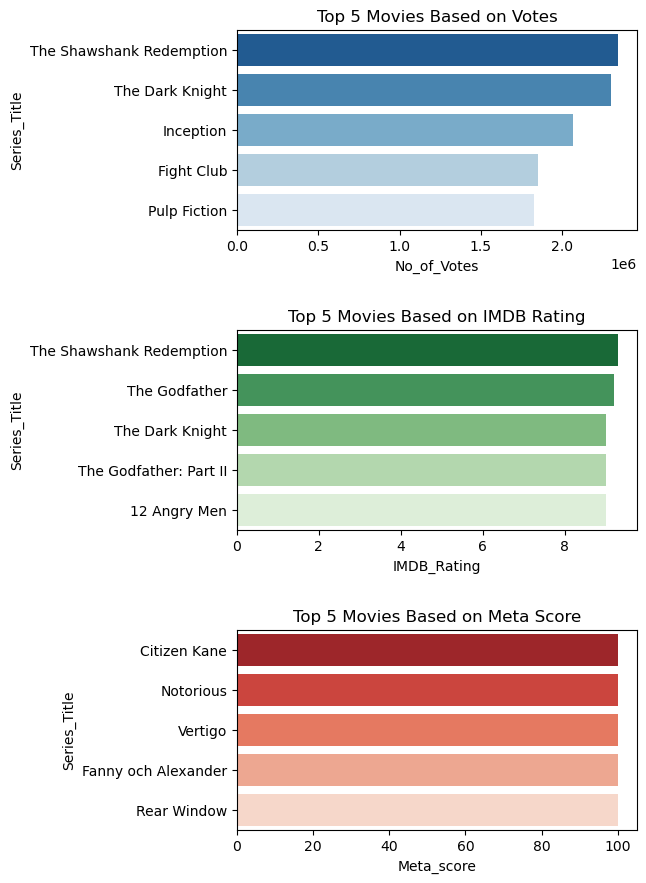

In [14]:
#top movies by vote, rating, and meta score
plt.figure(figsize=(8, 18))


top_movies_vote = df.sort_values(by='No_of_Votes', ascending=False).head(5)
top_movies_rating = df.sort_values(by='IMDB_Rating', ascending=False).head(5)
top_movies_meta = df.sort_values(by='Meta_score', ascending=False).head(5)

plt.figure(figsize=(5, 10))
plt.subplot(3,1,1)
sns.barplot(x='No_of_Votes', y='Series_Title', data=top_movies_vote, palette='Blues_r')
plt.title('Top 5 Movies Based on Votes')

plt.subplot(3,1,2)
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_movies_rating, palette='Greens_r')
plt.title('Top 5 Movies Based on IMDB Rating')

plt.subplot(3,1,3)
sns.barplot(x='Meta_score', y='Series_Title', data=top_movies_meta, palette='Reds_r')
plt.title('Top 5 Movies Based on Meta Score')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

#### Hidden Gems
Often times, there are amazing movies that never make it in front of mainstream audiences. These are considered Hidden Gems. IMDB defines a hidden gem as "films that never quite crept into the mainstream and deserve a far larger audience". 

Here, we are looking to find the hidden gems of the top 1000 IMDB rated movies. These will be determined by movies with a high ratio of IMDB ratings to audience votes.

In [25]:
# Hidden gems- determined by ratio of imdb rating to audience votes
# low votes, high rating is a hidden gem
hidden_gems = pd.DataFrame({
    'Movie title':df['Series_Title'],
    'Hidden gem score':df['IMDB_Rating']/df['No_of_Votes']
})
hidden_gems= hidden_gems.sort_values(by='Hidden gem score', ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Hidden Gems')

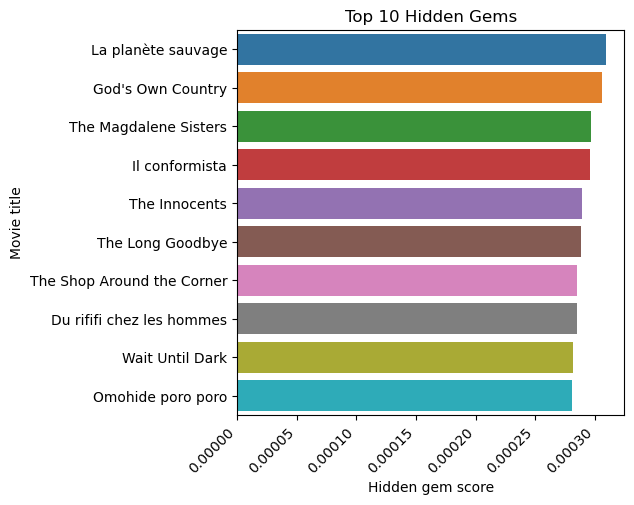

In [24]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Hidden gem score', y='Movie title', data=hidden_gems)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Hidden Gems')

#### Top Stars
Now, we will explore who the biggest names are in Hollywood. To do this, we will rank the top stars based on vote and number of appearances in different films.

Text(0, 0.5, 'Actors (Star 1)')

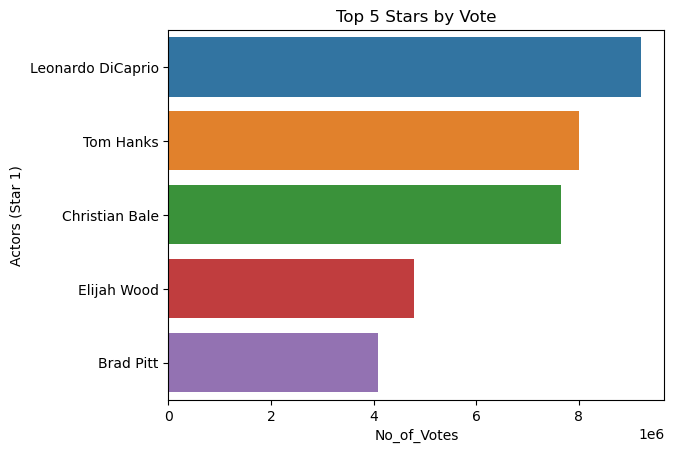

In [15]:
# top stars by total number of votes

# create dataframe to group by stars and a sum of their votes
top_stars = df.groupby('Star1')['No_of_Votes'].sum()
top_stars = top_stars.reset_index()

top_stars.sort_values(by='No_of_Votes', ascending=False, inplace=True)

sns.barplot(x='No_of_Votes', y='Star1', data=top_stars.head())

plt.title('Top 5 Stars by Vote')
plt.ylabel('Actors (Star 1)')

Text(0, 0.5, 'Frequency')

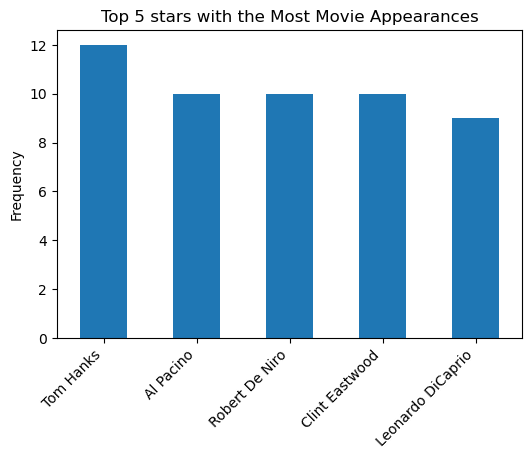

In [58]:
# stars with the most movie appearances
stars1 = df['Star1'].value_counts()
stars2 = df['Star2'].value_counts()
stars3 = df['Star3'].value_counts()
stars4 = df['Star4'].value_counts()

# combine all star columns into one dataframe
combined = pd.concat([stars1, stars2, stars3, stars4]).nlargest(5)
combined.sort_values(ascending=False, inplace=True)

# plot the stars with the most appearances
plt.figure(figsize=(6,4))
combined.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title("Top 5 stars with the Most Movie Appearances")
plt.ylabel("Frequency")

We can see that the top actors are different between most votes and most appearances, but Leonardo DiCaprio and Tom Hanks were ranked in the top 5 for both categories.

### Box office earnings over time

We are going to create a line plot to see how the gross earnings of the top films have changed over time, using the seaborn library.

[Text(0.5, 1.0, 'Box Office Earnings Over the Years')]

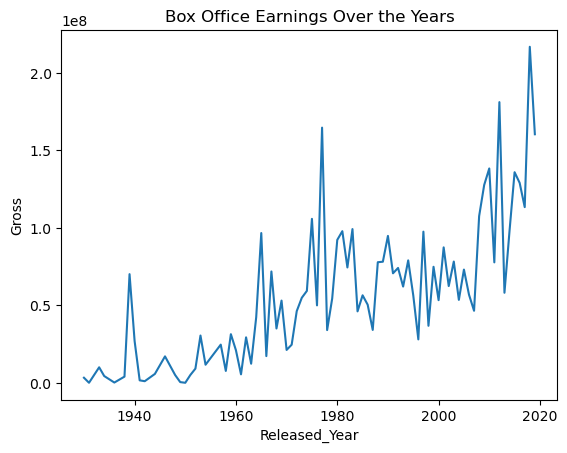

In [12]:
# box office earnings over time
time_plot = df[['Released_Year','Gross']]
time_plot = time_plot[time_plot['Released_Year'] != 'PG']
time_plot['Released_Year'] = time_plot['Released_Year'].astype(int)
sns.lineplot(x='Released_Year', y='Gross', data=time_plot, errorbar=None).set(title='Box Office Earnings Over the Years')

We can see that __gross earnings have gradually increased over the years__, and quickly increased after around 2010.

### Analysis of Top Average Gross Earnings

#### Highest Earning Actors
We will now determine who the top earners are in Hollywood and visualize this data using the Seaborn library.

Text(0.5, 1.0, 'Top 5 Earning Actors (Star 1)')

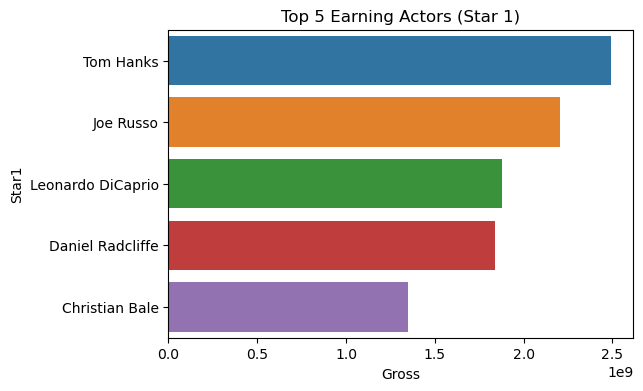

In [59]:
# Main actors with highest average gross earnings

star_earnings = df.groupby('Star1')['Gross'].sum()
star_earnings = star_earnings.reset_index()

star_earnings.sort_values(by='Gross', ascending=False, inplace=True)

plt.figure(figsize=(6,4))
sns.barplot(x='Gross', y='Star1', data=star_earnings.head())
plt.title("Top 5 Earning Actors (Star 1)")

#### Highest Earning Directors

Text(0.5, 1.0, 'Top 10 Earning Directors (by Average)')

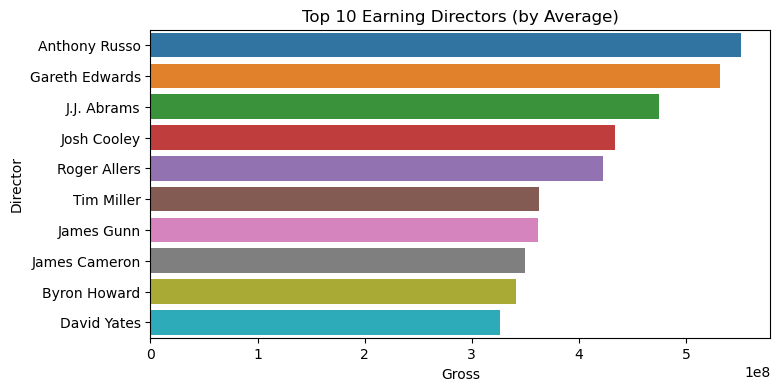

In [55]:
# Analysis of the gross earning of movies vs. director
# Is there a disparity in earnings?
# boxplot distribution

directors = df.groupby('Director')['Gross'].mean()
directors = directors.reset_index()

directors.sort_values(by='Gross',ascending=False,inplace=True)

#directors.dropna(inplace=True)

plt.figure(figsize=(8,4))
sns.barplot(x='Gross', y='Director', data=directors.head(10))
plt.title("Top 10 Earning Directors (by Average)")

### Distribution of Numerical Measures

In [8]:
# summarizing the spread of the data
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,750.000000,750.000000,7.500000e+02,7.500000e+02
mean,7.934800,77.460000,3.421327e+05,7.495207e+07
std,0.289103,12.493967,3.509795e+05,1.133280e+08
min,7.600000,28.000000,2.519800e+04,1.305000e+03
25%,7.700000,70.000000,8.854725e+04,5.014812e+06
50%,7.900000,78.000000,2.197340e+05,3.190000e+07
75%,8.100000,86.000000,4.812185e+05,9.809157e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


Some of this information can be vizualized in the form of a histogram to make the data more visually digestible.

Text(0.5, 1.0, 'Distribution of Votes')

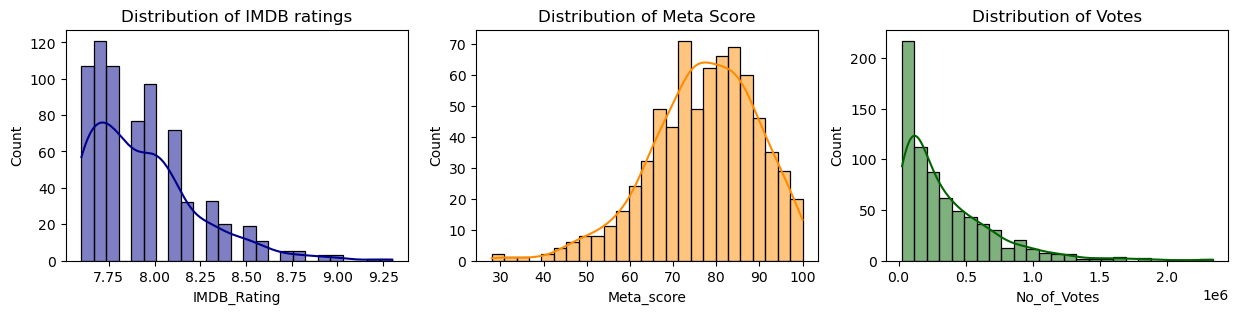

In [7]:
# visualize distributions of ratings, meta scores, and votes

plt.figure(figsize=(15,3))

# Density Plot and Histogram of all arrival delays
plt.subplot(1,3,1)
sns.histplot(df['IMDB_Rating'], bins=25, kde=True, color='darkblue')
plt.title("Distribution of IMDB ratings")

plt.subplot(1,3,2)
sns.histplot(df['Meta_score'], bins=25, kde=True, color='darkorange')
plt.title("Distribution of Meta Score")


plt.subplot(1,3,3)
sns.histplot(df['No_of_Votes'], bins=25, kde=True, color='darkgreen')
plt.title("Distribution of Votes")

We can see that IMDB ratings and audience votes are quite heavily skewed right, while meta score is skewed left.

## Data Analysis & Hypothesis Testing

Data analysis is way of examing data to draw conclusions. Hypothesis testing is a formal way to investigate data using statistics. First we will determine, are there any correlations bewteen the numerical data? Second, we will invesigate the spread of the gross earnings and how much, if any, disparity there is in earnings in film industry gross earnings.

We will start by creating a correlation heatmap, a feature of Seaborn. This will give us an R^2 value to describe the correlation between each of the numerical measures provided in the IMDB dataset. R-squared, or R^2, is a statistical measure that shows how well a model fits data, or the goodness of fit. It shows how well the data fits a regression model.

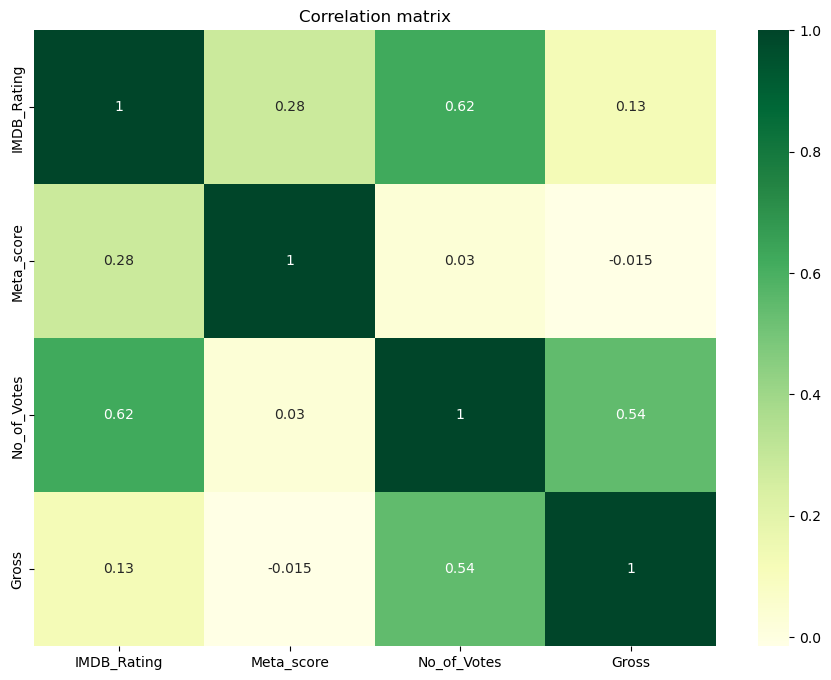

In [8]:
# Correlation matrix
df_corr = df[["IMDB_Rating","Meta_score","No_of_Votes","Gross"]]
corr = df_corr.corr()
plt.figure(figsize=(11,8))
plt.title("Correlation matrix")
sns.heatmap(corr, cmap="YlGn",annot=True)
plt.show()

It is apparent that Number of Votes and Gross earnings, and Number of Votes and IMDB rating have the highest R^2 value. We will now plot these measures on scatter plots.

#### Scatter plots

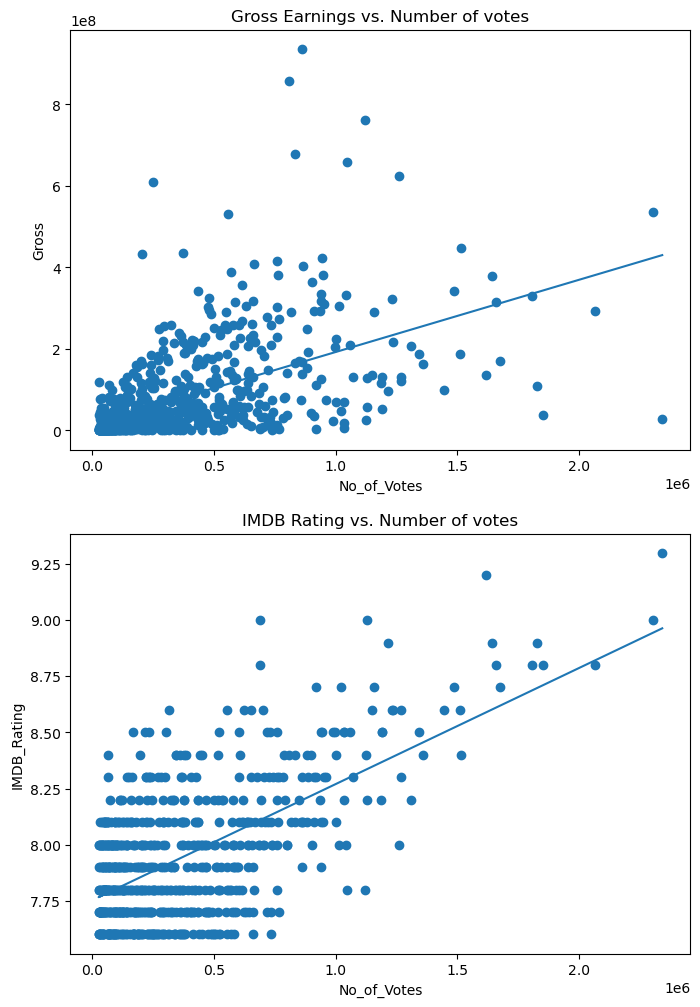

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 12))

x = df['No_of_Votes']
y1 = df['Gross']
y2 = df['IMDB_Rating']

ax1.scatter(x,y1)
ax1.set_title('Gross Earnings vs. Number of votes')
ax1.set(xlabel='No_of_Votes', ylabel='Gross')

ax2.scatter(x, y2)
ax2.set_title('IMDB Rating vs. Number of votes')
ax2.set(xlabel='No_of_Votes', ylabel='IMDB_Rating')

# add best fit lines
a1,b1 = np.polyfit(x, y1, 1)
ax1.plot(x, a1*x+b1)

a2,b2 = np.polyfit(x, y2, 1)
ax2.plot(x, a2*x+b2)

#### Disparities in Hollywood Earnings
The next questions we would like to answer are: Is there a disparity in gross earnings in Hollywood? How much more are the top actors and directors earning than the majority in the film industry?

We may gain insights into this question by analyzing a boxplot distribution of average gross earnings by individual.

[Text(0.5, 1.0, 'Distribution of Average Gross Earnings')]

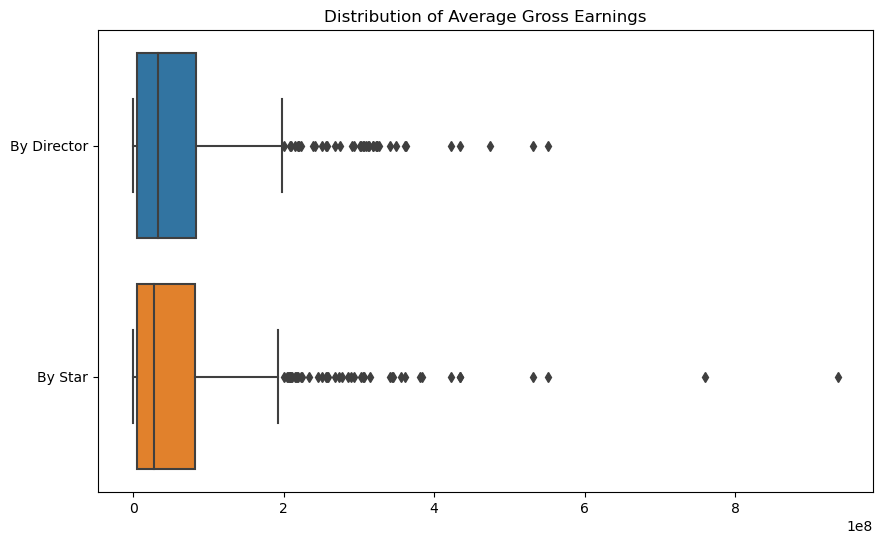

In [53]:
box_df = pd.DataFrame({
    'By Director':df.groupby('Director')['Gross'].mean(),
    'By Star':df.groupby('Star1')['Gross'].mean()
})

plt.figure(figsize=(10,6))
sns.boxplot(data=box_df, orient='h').set(title='Distribution of Average Gross Earnings')

It is clear that the top actors and directors earn far greater than the majority. The top directors bring in more than sixfold what the median director makes, while the top actors bring in more than eightfold what a median actor makes in a top 1000 movie.